# Lead Scoring Case Study

- Domain Knowledge
- Data Understanding(data dict)
- EDA
    - Data Cleaning & Treatment
    - Visualization
- Model Building
- Model Testing
    - Model Evaluation

### Domain Konwledge 
**Problem Statement**
  - Building a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads
  - A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
   


In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Understanding(data dict)
 - Reading the data from CSV file
 - Checking the shape of the data 
 - checking the datatypes of all columns
 - describing the dataset 

In [4]:
#read the dataset and check the first five rows
inp0 = pd.read_csv('Lead Scoring Assignment/Leads.csv')
inp0.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#Check the shape of the dataframe
inp0.shape

(9240, 37)

In [5]:
#Check the datatypes of all the columns of the dataframe
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#describing the dataset 
inp0.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### - 38% of them have been converted 
#### -Average of total number of times visit made is 3.44
#### - 251 is the maximum number of times visit made by person and 0 is the minimum number of times visit made by person 
#### - Average total time spent on website by customers is 487.69 and since there is gap between 75% percintile and maximum value there should be some outliers present 

### EDA
 ##### Data Cleaning & Treatment
   - The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ or __duplicates values__ before we proceed to the analysis stage. These mentioned problems are handled as follows :

 - check for duplicates
    - using duplicated method  
 
 
 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values if the missing percenteage is less 
    - Dropping the columns contating missing values if the missing percentage is more 
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column

In [7]:
#check for duplicates in Prospect ID 
sum(inp0.duplicated(subset = 'Prospect ID')) == 0

True

In [8]:
#check for duplicates in Lead Number 
sum(inp0.duplicated(subset = 'Lead Number')) == 0

True

Checking duplicate values present in __Prospect ID__ and __Lead Number__ column as these two columns will have unique values to uniquely identify each record according to the data dictinory of lead dataset, but there are no duplicate values found 

In [9]:
#Checking the number of null values in the columns
inp0.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Calculating the percentage of null values in the lead dataset 
round(100*inp0.isna().sum()/len(inp0),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
#Dropping columns with more than 35% null values
cols=inp0.columns

for i in cols:
    if((100*(inp0[i].isnull().sum()/len(inp0))) >= 35):
        inp0.drop(i, 1, inplace = True)

In [12]:
inp0.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


##### Removed 6 columns as they were having more than 35% missing value percentage which is very significantly high in number 

In [13]:
# Calculating the percentage of null values in the lead dataset 
round(100*inp0.isna().sum()/len(inp0),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [14]:
#Checking value counts for country variable to replace missing values with mode 
inp0['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

##### India is having Highest number of counts with 6492 counts and there are 2461 missing values , if we try to impute 2461 missing values with mode value which is one of the best method for imputing categorical value  value conts of India will become 8953 which will constitue nearly 95% of the data and in analysis it will not be much helpful hence droping this column  

In [15]:
inp0.drop('Country', 1, inplace = True)

In [16]:
inp0.shape

(9240, 30)

In [17]:
# Calculating the percentage of null values in the lead dataset 
round(100*inp0.isna().sum()/len(inp0),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [18]:
#Checking value counts for Specialization variable to replace missing values with mode 
inp0['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [19]:
# Replacing null values in the Specialization column with 'Not Specified' as this would make sense rather than imputing with mode value which would in way affect the analysis
inp0['Specialization'].fillna('Not Specified', inplace = True)

In [20]:
round(100*inp0.isna().sum()/len(inp0),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [21]:
#Checking value counts for 'How did you hear about X Education' variable to replace missing values with mode 
inp0['How did you hear about X Education'].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [22]:
# Replacing null values in the 'How did you hear about X Education' column with 'Not Specified' as this would make sense rather than imputing with mode value which would in way affect the analysis
inp0['How did you hear about X Education'].fillna('Not Specified', inplace = True)

In [23]:
#checking value counts of 'What is your current occupation' column
inp0['What is your current occupation'].value_counts(dropna=False) 

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
# Replacing null values in the 'What is your current occupation' column with 'Not Specified' as this would make sense rather than imputing with mode value which would in way affect the analysis
inp0['What is your current occupation'].fillna('Not Specified', inplace = True)

In [25]:
round(100*inp0.isna().sum()/len(inp0),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
How did you hear about X Education                0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [26]:
#checking value counts of 'What matters most to you in choosing a course' column
inp0['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [27]:
# Replacing null values in the 'What matters most to you in choosing a course' column with 'Not Specified' as this would make sense rather than imputing with mode value which would in way affect the analysis
inp0['What matters most to you in choosing a course'].fillna('Not Specified', inplace = True)

In [28]:
round(100*inp0.isna().sum()/len(inp0),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
How did you hear about X Education                0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [30]:
#checking value counts of City column
inp0['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [31]:
# Replacing null values in the 'City' column with 'Not Specified' as this would make sense rather than imputing with mode value which would in way affect the analysis
inp0['City'].fillna('Not Specified', inplace = True)

In [32]:
round(100*inp0.isna().sum()/len(inp0),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
How did you hear about X Education                0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [33]:
#checking value counts of City column
inp0['Lead Profile'].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [34]:
# Replacing null values in the 'Lead Profile' column with 'Not Specified' as this would make sense rather than imputing with mode value which would in way affect the analysis
inp0['Lead Profile'].fillna('Not Specified', inplace = True)

In [35]:
#checking value counts of Lead Source column
inp0['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [36]:
#Replacing some of the columns others columns 
inp0['Lead Source'] = inp0['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads','testone','NC_EDM'] ,'Others')

inp0['Lead Source'] = inp0['Lead Source'].replace('Facebook','Social Media')

In [37]:
#checking value counts of Lead Source column
inp0['Lead Source'].value_counts(dropna=False)

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
NaN                   36
Others                19
google                 5
Live Chat              2
Name: Lead Source, dtype: int64

In [38]:
inp0['Lead Source'].fillna('Others', inplace = True)

In [42]:
#checking value counts of Last Activity column
inp0['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [43]:
#replacing some of the columns with of last activity with Others column name 
inp0['Last Activity'] = inp0['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                        'View in browser link Clicked', 'Email Marked Spam','Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [45]:
#Filling null values in Last Activity with Others column
inp0['Last Activity'].fillna('Others', inplace = True)

In [46]:
round(100*inp0.isna().sum()/len(inp0),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [48]:
#Imputing Total Visits values with Median as it is contionous variable
med = inp0['TotalVisits'].median()
inp0['TotalVisits'].replace(np.NaN, med, inplace =True)

In [49]:
#Checking the stat for 'Page Views Per Visit' column to validate which one to use for imputing as mean and median can be used 
#since it is continous variable and here for this column both the values are similar so we can use median 
inp0['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [50]:
#Imputing Page Views Per Visit values with Median as it is contionous variable
med_page = inp0['Page Views Per Visit'].median()
inp0['Page Views Per Visit'].replace(np.NaN, med_page, inplace =True)

In [51]:
round(100*inp0.isna().sum()/len(inp0),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

##### We can see the missing value percenatge for all column is 0 hence we have treated missing values  

### EDA
 ##### Visualization 
 
 - Univariate analysis 
 - Multivariate analysis 
 - Outlier treatment 

In [52]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

###### Univariate Analysis  

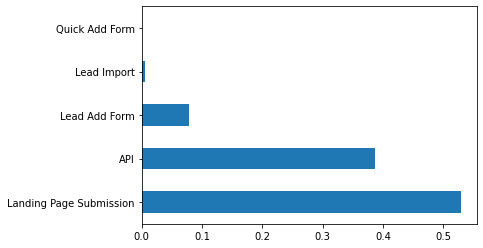

In [55]:
#plot the bar graph of percentage Lead Origin
inp0['Lead Origin'].value_counts(normalize=True).plot.barh()
plt.show()

In [57]:
inp0['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

###### Landing Page Submission has highest % of lead origin  

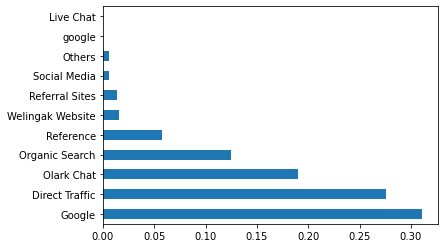

In [58]:
#plot the bar graph of percentage Lead Source
inp0['Lead Source'].value_counts(normalize=True).plot.barh()
plt.show()

######   Leads have been sourced lot through google search 

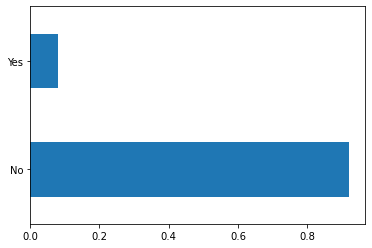

In [59]:
#plot the bar graph of percentage Do Not Email
inp0['Do Not Email'].value_counts(normalize=True).plot.barh()
plt.show()

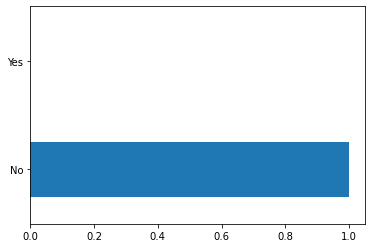

In [70]:
#plot the bar graph of percentage Do Not Email
inp0['Do Not Call'].value_counts(normalize=True).plot.barh()
plt.show()

###### -  This column can be dropped as this does not have More number of Yes which immablances the analysis  

In [71]:
inp0.drop('Do Not Call', 1, inplace = True)

###### 90% of the customer does not want to be emailed about course  

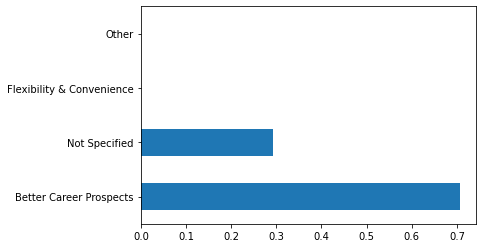

In [74]:
#plot the bar graph of percentage Do Not Email
inp0['What matters most to you in choosing a course'].value_counts(normalize=True).plot.barh()
plt.show()

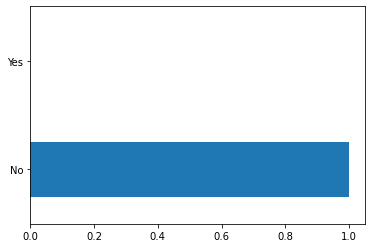

In [60]:
#plot the bar graph of percentage Digital Advertisement
inp0['Digital Advertisement'].value_counts(normalize=True).plot.barh()
plt.show()

###### No any customer had seen any digital advertisement regarding the  course 

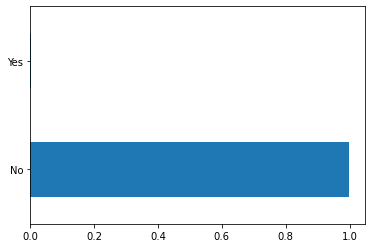

In [75]:
#plot the bar graph of percentage Search
inp0['Search'].value_counts(normalize=True).plot.barh()
plt.show()

###### This column can be dropped as it has only Yes value  

In [76]:
inp0.drop('Search', 1, inplace = True)

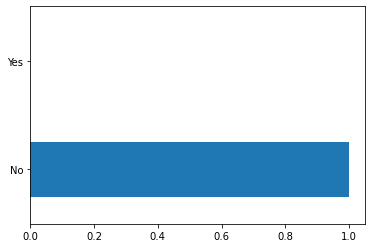

In [77]:
#plot the bar graph of percentage Newspaper Article
inp0['Newspaper Article'].value_counts(normalize=True).plot.barh()
plt.show()

###### This column can be dropped as It has only No value 

In [78]:
inp0.drop('Newspaper Article', 1, inplace = True)

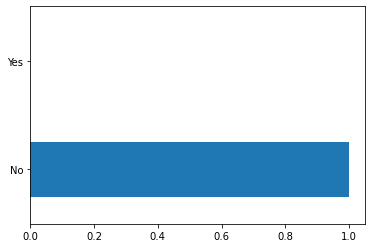

In [79]:
#plot the bar graph of percentage X Education Forums
inp0['X Education Forums'].value_counts(normalize=True).plot.barh()
plt.show()

###### This column can be dropped as it has only No Values 

In [80]:
inp0.drop('X Education Forums', 1, inplace = True)

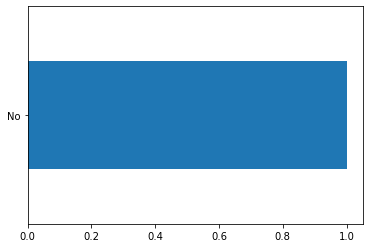

In [81]:
#plot the bar graph of percentage Magazine
inp0['Magazine'].value_counts(normalize=True).plot.barh()
plt.show()

###### This column can be dropped as it has only no values in it  

In [82]:
inp0.drop('Magazine', 1, inplace = True)

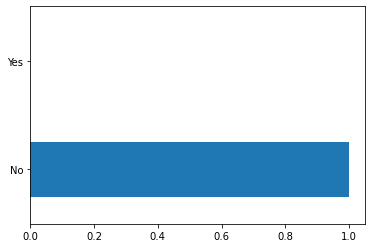

In [83]:
#plot the bar graph of percentage Digital Advertisement
inp0['Digital Advertisement'].value_counts(normalize=True).plot.barh()
plt.show()

###### This column can be dropped as it has only No values in it 

In [84]:
inp0.drop('Digital Advertisement', 1, inplace = True)

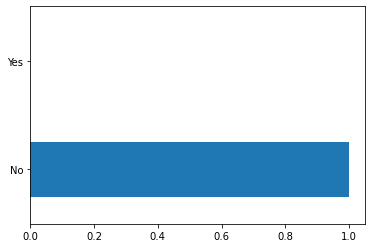

In [85]:
#plot the bar graph of percentage Through Recommendations
inp0['Through Recommendations'].value_counts(normalize=True).plot.barh()
plt.show()

###### This column can be dropped as it has only No Values in it 

In [86]:
inp0.drop('Through Recommendations', 1, inplace = True)

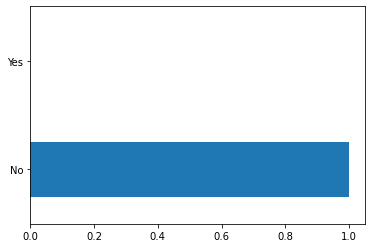

In [87]:
#plot the bar graph of percentage Newspaper
inp0['Newspaper'].value_counts(normalize=True).plot.barh()
plt.show()

###### This column can be dropped as it has only No Values in it  

In [88]:
inp0.drop('Newspaper', 1, inplace = True)

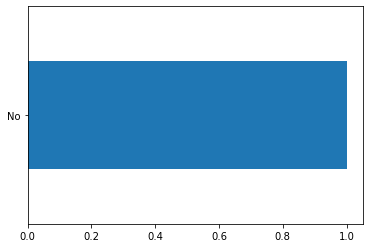

In [89]:
#plot the bar graph of percentage Receive More Updates About Our Courses
inp0['Receive More Updates About Our Courses'].value_counts(normalize=True).plot.barh()
plt.show()

###### This column can be dropped as it has only No Values In it  

In [90]:
inp0.drop('Receive More Updates About Our Courses', 1, inplace = True)

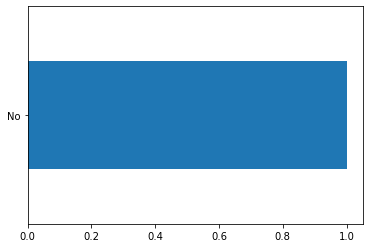

In [91]:
#plot the bar graph of percentage  on Update me on Supply Chain Content
inp0['Update me on Supply Chain Content'].value_counts(normalize=True).plot.barh()
plt.show()

###### This column can be dropped since it has only No Values in it and not much useful in analysis  

In [92]:
inp0.drop('Update me on Supply Chain Content', 1, inplace = True)

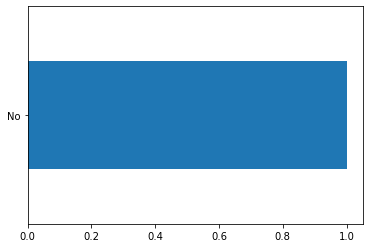

In [93]:
#plot the bar graph of percentage on Get updates on DM Content
inp0['Get updates on DM Content'].value_counts(normalize=True).plot.barh()
plt.show()

###### This column can be dropped as it has only no values in it 

In [94]:
inp0.drop('Get updates on DM Content', 1, inplace = True)

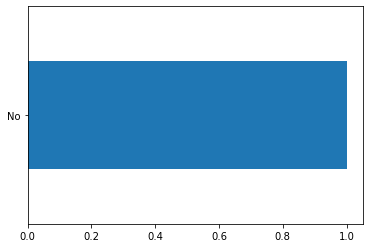

In [95]:
#plot the bar graph of percentage on I agree to pay the amount through cheque
inp0['I agree to pay the amount through cheque'].value_counts(normalize=True).plot.barh()
plt.show()

###### This column can be dropped as it has only No Values in it  

In [96]:
inp0.drop('I agree to pay the amount through cheque', 1, inplace = True)

In [97]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9240 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9240 non-null   float64
 9   Last Activity                                  9240 

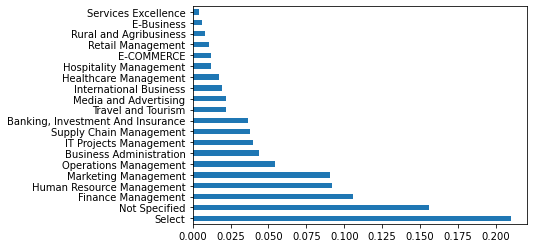

In [61]:
#plot the bar graph of percentage Specialization
inp0['Specialization'].value_counts(normalize=True).plot.barh()
plt.show()

###### Most of the customers had not selected any specialisation in which specialisation before they had worked while filling forms  
###### Around 15% customers have not mentioned any  specialization
###### Among the specializations mentioned by customers , more number of customers were working in finance management 

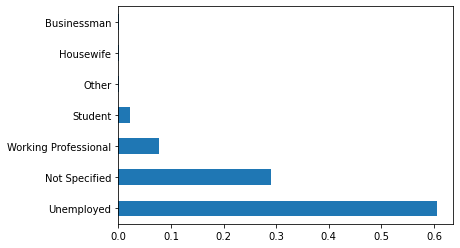

In [62]:
#plot the bar graph of percentage 'What is your current occupation'
inp0['What is your current occupation'].value_counts(normalize=True).plot.barh()
plt.show()

###### Most number of the customers are un employment while applying for the course 

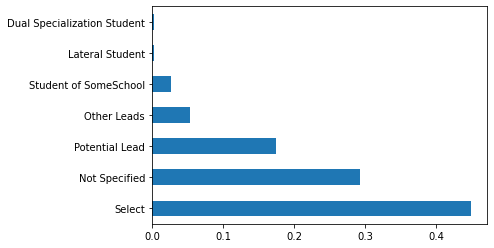

In [63]:
#plot the bar graph of percentage 'Lead Profile'
inp0['Lead Profile'].value_counts(normalize=True).plot.barh()
plt.show()

###### Most of the customers have not selected profile while filling out form  

###### Multi Variate Analysis  

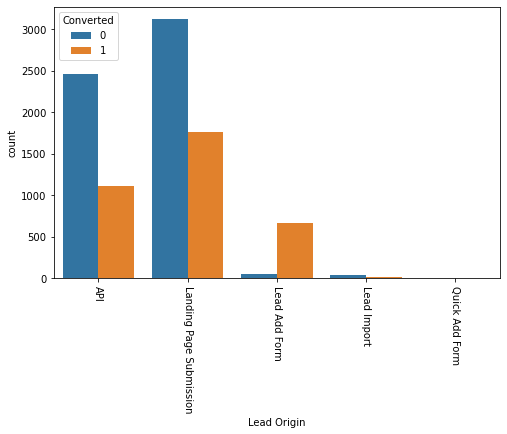

In [67]:
#multivariate analysis of converted and Lead Origin
plt.figure(figsize=(8,5))
s_1=sns.countplot(inp0['Lead Origin'], hue=inp0.Converted)
s_1.set_xticklabels(s_1.get_xticklabels(),rotation=270)
plt.show()

###### - Quick Add Form has only one count 
###### - API and Landing Page Submission lead origins have very less conversion rate 
###### - Lead Add Form origin has higher conversion rate of lead 

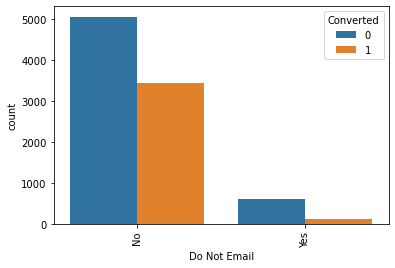

In [72]:
##visualizing count of Do Not Email based on Converted value
ax2=sns.countplot(inp0['Do Not Email'], hue=inp0.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

######  - Customers who does not want to be notified through Email have higher conversion rate than customers who does not want to be notified through call which was dropped alreday

###### Outlier Treatment  

In [98]:
#Knowing which variable has more outliers 
inp0.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [99]:
#TotalVisits has more Outliers 
inp0['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

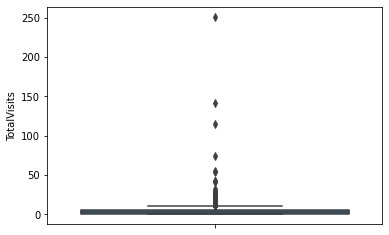

In [101]:
# Box plot visualisation to know the spread of variable 
plt.figure(figsize=(6,4))
sns.boxplot(y=inp0['TotalVisits'])
plt.show()

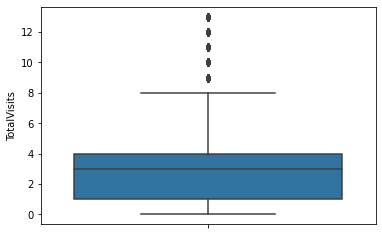

In [103]:
# Removing top and bottom 2% values of the outlier column for outlier treatment 
Q3 = inp0.TotalVisits.quantile(0.98)
inp0 = inp0[(inp0.TotalVisits <= Q3)]
Q1 = inp0.TotalVisits.quantile(0.02)
inp0 = inp0[(inp0.TotalVisits >= Q1)]
sns.boxplot(y=inp0['TotalVisits'])
plt.show()

In [104]:
#Page Views Per Visit has more Outliers next to TotalVisits
inp0['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9066.000000
mean        2.298612
std         1.979081
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        13.000000
Name: Page Views Per Visit, dtype: float64

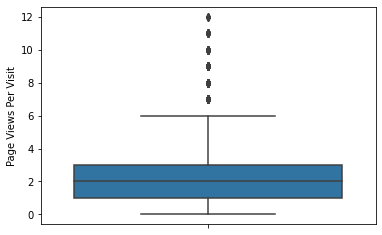

In [105]:
# Removing top and bottom 1% values of the outlier column for outlier treatment 
Q3 = inp0.TotalVisits.quantile(0.99)
inp0 = inp0[(inp0.TotalVisits <= Q3)]
Q1 = inp0.TotalVisits.quantile(0.01)
inp0 = inp0[(inp0.TotalVisits >= Q1)]
sns.boxplot(y=inp0['Page Views Per Visit'])
plt.show()

In [106]:
#Heat Map with Correlation matrix
corr = inp0.corr()
corr

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.028079,0.054847,0.022928,0.062341
Converted,0.028079,1.000000,0.042262,0.357881,-0.003768
TotalVisits,0.054847,0.042262,1.000000,0.361454,0.778850
Total Time Spent on Website,0.022928,0.357881,0.361454,1.000000,0.340785
Page Views Per Visit,0.062341,-0.003768,0.778850,0.340785,1.000000


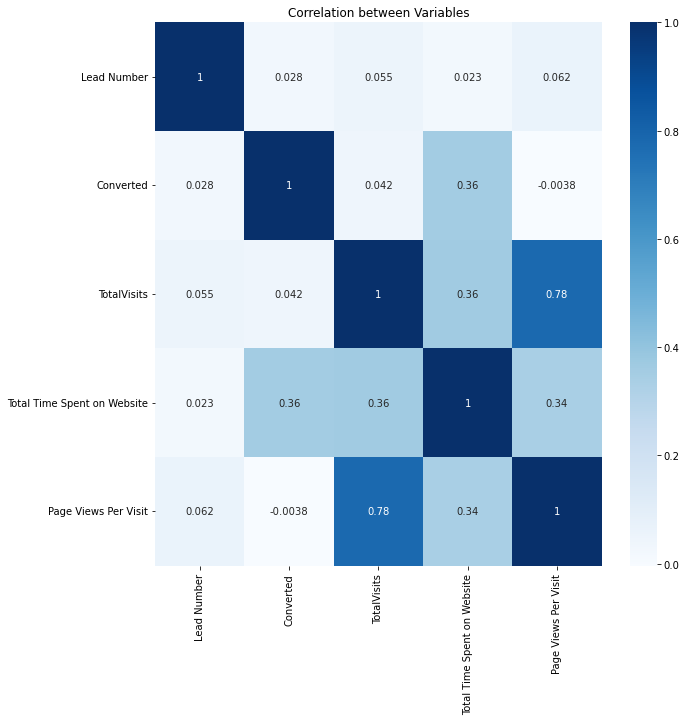

In [109]:
#plotting heat map 
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.title("Correlation between Variables")
plt.show()

###### Converted has high correlation with Total Time Spent on Website
###### Total Time Spent On Website has high correlation with TotalVisits

### Model Building 
- Creation of dummy variables
- Test-Train Split
- Feature Scaling
- Feature Selection Using RFE 

###### Creation of dummy variables  

In [110]:
#Getting list of categorical columns 
categ_cols= inp0.select_dtypes(include=['object']).columns
categ_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [111]:
inp0.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,Select,Select,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,Select,Select,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,Potential Lead,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Select,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,Select,Mumbai,No,Modified


In [112]:
var_li =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the list
inp0[var_li] = inp0[var_li].apply(binary_map)

In [116]:
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

In [119]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9018 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9018 non-null   object 
 1   Lead Number                                           9018 non-null   int64  
 2   Lead Origin                                           9018 non-null   object 
 3   Lead Source                                           9018 non-null   object 
 4   Do Not Email                                          9018 non-null   int64  
 5   Converted                                             9018 non-null   int64  
 6   TotalVisits                                           9018 non-null   float64
 7   Total Time Spent on Website                           9018 non-null   int64  
 8   Page Views Per Visit                                  9018

In [120]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [121]:
leads.shape

(9018, 54)

In [122]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [123]:
leads.shape

(9018, 64)

In [125]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [128]:
leads.drop(categ_cols,1,inplace = True)
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,...,Lead Source_Welingak Website,Lead Source_google,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


###### Test-Train Split 

In [129]:
from sklearn.model_selection import train_test_split

In [131]:
# Putting feature variable to X removing targte Converted variable and Lead Number which is unqiue and does not add any value to the analysis
X = leads.drop(['Converted','Lead Number'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Not Specified,What is your current occupation_Other,...,Lead Source_Welingak Website,Lead Source_google,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [133]:
# Putting response variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [134]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

###### Feature Scaling 

In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Not Specified,What is your current occupation_Other,...,Lead Source_Welingak Website,Lead Source_google,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
2853,1.134825,0.878135,1.911837,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6804,-0.005661,-0.783492,-0.396854,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6591,-0.385824,1.208990,-0.140333,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4922,-0.005661,2.319192,0.372709,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5931,-0.005661,1.464484,0.372709,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


###### Feature Selection Using RFE 

In [147]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [149]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg) 
rfe = rfe.fit(X_train, y_train)

In [150]:
rfe.support_

array([ True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True])

In [151]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 20),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Not Specified', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Not Specified', True, 1),
 ('City_Other Cities', False, 25),
 ('City_Other Cities of Maharashtra', False, 19),
 ('City_Other Metro Cities', False, 26),
 ('City_Select', True, 1),
 ('City_Thane & Outskirts', False, 24),
 ('City_Tier II Cities', False, 27),
 ('Specialization_Banking, Investment And Insurance', False, 3),
 ('Specialization_Business Administra

In [152]:
col = X_train.columns[rfe.support_]

In [153]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Quick Add Form',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness', 'Specialization_Select',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Spec

In [156]:
#accessing the model with stats model 
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6312
Model:                            GLM   Df Residuals:                     6283
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2537.2
Date:                Mon, 23 Jan 2023   Deviance:                       5074.3
Time:                        17:45:50   Pearson chi2:                 6.61e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4115
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6017      1.187      1.350      0.177      -0.724       3.928
TotalVisits                                              0.1498      0.048      3.129      0.002       0.056       0.244
Total Time Spent on Website                              1.0729      0.041     26.167      0.000       0.993       1.153
Lead Origin_Landing Page Submission                     -0.9919      0.146     -6.776      0.000      -1.279      -0.705
Lead Origin_Lead Add Form                                2.1226      0.650      3.265      0.001       0.849       3.397
Lead Origin_Lead Import                                 -1.5088      0.755     -1.998      0.046      -2.989      -0.029
What is your current occupation_Housewife               21.8332   1.46e+04      0.001      0.999   -2.86e+04    2.87e+04
What is your current occupation_Not Specified           -2.2941      1.005     -2.283      0.022      -4.263      -0.325
What is your current occupation_Other                   -1.6597      1.296     -1.280      0.200      -4.200       0.881
What is your current occupation_Student                 -1.1207      1.025     -1.094      0.274      -3.129       0.888
What is your current occupation_Unemployed              -1.0941      0.999     -1.095      0.274      -3.053       0.864
What is your current occupation_Working Professional     1.4246      1.015      1.404      0.160      -0.564       3.413
City_Not Specified                                      -0.9646      0.201     -4.789      0.000      -1.359      -0.570
City_Select                                             -0.7828      0.139     -5.625      0.000      -1.056      -0.510
Specialization_E-Business                                0.5461      0.409      1.335      0.182      -0.255       1.348
Lead Source_Direct Traffic                              -1.1673      0.625     -1.869      0.062      -2.391       0.057
Lead Source_Google                                      -0.9463      0.623     -1.519      0.129      -2.168       0.275
Lead Source_Olark Chat                                   0.3364      0.633      0.532      0.595      -0.903       1.576
Lead Source_Organic Search                              -1.1584      0.629     -1.841      0.066      -2.391       0.075
Lead Source_Referral Sites                              -1.3905      0.720     -1.932      0.053      -2.801       0.020
Lead Source_Welingak Website                             3.0128      1.035      2.912      0.004       0.985       5.040
Lead Source_google                                     -21.2287   2.54e+04     -0.001      0.999   -4.99e+04    4.98e+04
Last Activity_Converted to Lead                         -0

In [157]:
#Removing columns having high P > |Z| values 
col = col.drop('What is your current occupation_Housewife',1)
col = col.drop('Lead Source_google',1)
col = col.drop('Lead Source_Olark Chat',1)
col = col.drop('What is your current occupation_Student',1)
col = col.drop('What is your current occupation_Unemployed',1)
col = col.drop('What is your current occupation_Other',1)
col = col.drop('Last Activity_Page Visited on Website',1)
col = col.drop('What is your current occupation_Working Professional',1)
col = col.drop('Specialization_E-Business',1)

In [158]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6312
Model:                            GLM   Df Residuals:                     6292
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2678.6
Date:                Mon, 23 Jan 2023   Deviance:                       5357.1
Time:                        18:05:58   Pearson chi2:                 6.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3845
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.8377      0.173      4.841      0.000       0.499       1.177
TotalVisits                                       0.1272      0.046      2.759      0.006       0.037       0.217
Total Time Spent on Website                       1.0734      0.040     26.922      0.000       0.995       1.152
Lead Origin_Landing Page Submission              -0.9446      0.141     -6.686      0.000      -1.222      -0.668
Lead Origin_Lead Add Form                         2.0693      0.206     10.055      0.000       1.666       2.473
Lead Origin_Lead Import                          -1.7444      0.417     -4.183      0.000      -2.562      -0.927
What is your current occupation_Not Specified    -1.4268      0.116    -12.274      0.000      -1.655      -1.199
City_Not Specified                               -0.9170      0.199     -4.604      0.000      -1.307      -0.527
City_Select                                      -0.8326      0.136     -6.134      0.000      -1.099      -0.567
Lead Source_Direct Traffic                       -1.4726      0.151     -9.783      0.000      -1.768      -1.178
Lead Source_Google                               -1.2300      0.135     -9.132      0.000      -1.494      -0.966
Lead Source_Organic Search                       -1.4313      0.163     -8.784      0.000      -1.751      -1.112
Lead Source_Referral Sites                       -1.4983      0.352     -4.257      0.000      -2.188      -0.809
Lead Source_Welingak Website                      2.6220      1.033      2.538      0.011       0.597       4.647
Last Activity_Converted to Lead                  -0.3203      0.222     -1.444      0.149      -0.755       0.115
Last Activity_Email Bounced                      -1.6647      0.347     -4.793      0.000      -2.345      -0.984
Last Activity_Email Opened                        0.5048      0.115      4.371      0.000       0.278       0.731
Last Activity_Form Submitted on Website          -0.2241      0.334     -0.671      0.502      -0.878       0.430
Last Activity_Olark Chat Conversation            -0.9978      0.192     -5.197      0.000      -1.374      -0.622
Last Activity_SMS Sent                            1.6564      0.118     13.990      0.000       1.424       1.888
=================================================================================================================
"""

In [159]:
col = col.drop('Last Activity_Form Submitted on Website',1)
col = col.drop('Last Activity_Converted to Lead',1)

In [160]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6312
Model:                            GLM   Df Residuals:                     6294
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2679.7
Date:                Mon, 23 Jan 2023   Deviance:                       5359.5
Time:                        18:07:30   Pearson chi2:                 6.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3843
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.7699      0.167      4.623      0.000       0.443       1.096
TotalVisits                                       0.1426      0.045      3.171      0.002       0.054       0.231
Total Time Spent on Website                       1.0743      0.040     26.957      0.000       0.996       1.152
Lead Origin_Landing Page Submission              -0.9401      0.141     -6.666      0.000      -1.217      -0.664
Lead Origin_Lead Add Form                         2.0771      0.206     10.088      0.000       1.674       2.481
Lead Origin_Lead Import                          -1.7304      0.417     -4.151      0.000      -2.547      -0.913
What is your current occupation_Not Specified    -1.4296      0.116    -12.295      0.000      -1.657      -1.202
City_Not Specified                               -0.9097      0.199     -4.580      0.000      -1.299      -0.520
City_Select                                      -0.8272      0.135     -6.119      0.000      -1.092      -0.562
Lead Source_Direct Traffic                       -1.5041      0.149    -10.089      0.000      -1.796      -1.212
Lead Source_Google                               -1.2606      0.133     -9.456      0.000      -1.522      -0.999
Lead Source_Organic Search                       -1.4709      0.161     -9.147      0.000      -1.786      -1.156
Lead Source_Referral Sites                       -1.5307      0.351     -4.358      0.000      -2.219      -0.842
Lead Source_Welingak Website                      2.6186      1.033      2.535      0.011       0.594       4.643
Last Activity_Email Bounced                      -1.5757      0.343     -4.592      0.000      -2.248      -0.903
Last Activity_Email Opened                        0.5907      0.101      5.830      0.000       0.392       0.789
Last Activity_Olark Chat Conversation            -0.9153      0.185     -4.958      0.000      -1.277      -0.553
Last Activity_SMS Sent                            1.7440      0.104     16.747      0.000       1.540       1.948
=================================================================================================================
"""

In [161]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2853    0.764020
6804    0.018956
6591    0.567853
4922    0.494382
5931    0.552943
7110    0.213823
7910    0.666401
4719    0.760392
5806    0.934133
874     0.835199
dtype: float64

In [162]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.76401953, 0.01895574, 0.56785258, 0.49438163, 0.55294298,
       0.21382251, 0.66640089, 0.76039229, 0.93413253, 0.83519868])

In [164]:
#creating new dataframe for predicted value
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,1,0.764020,2853
1,0,0.018956,6804
2,1,0.567853,6591
3,1,0.494382,4922
4,1,0.552943,5931


In [165]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,1,0.764020,2853,1
1,0,0.018956,6804,0
2,1,0.567853,6591,1
3,1,0.494382,4922,0
4,1,0.552943,5931,1


In [167]:
from sklearn import metrics

In [171]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3390  484]
 [ 721 1717]]


In [169]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8090937896070975


In [173]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [174]:
#checking VIF's again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,7.03
8,Lead Source_Direct Traffic,4.35
9,Lead Source_Google,3.54
6,City_Not Specified,3.42
5,What is your current occupation_Not Specified,2.86
7,City_Select,2.60
14,Last Activity_Email Opened,2.40
16,Last Activity_SMS Sent,2.32
10,Lead Source_Organic Search,2.22
0,TotalVisits,1.83


In [175]:
col = col.drop('Lead Origin_Landing Page Submission', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'What is your current occupation_Not Specified', 'City_Not Specified',
       'City_Select', 'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent'],
      dtype='object')

In [176]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6312
Model:                            GLM   Df Residuals:                     6295
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2702.5
Date:                Mon, 23 Jan 2023   Deviance:                       5405.0
Time:                        18:26:32   Pearson chi2:                 6.24e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3798
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2297      0.143      1.610      0.107      -0.050       0.509
TotalVisits                                       0.1258      0.045      2.816      0.005       0.038       0.213
Total Time Spent on Website                       1.0781      0.040     27.174      0.000       1.000       1.156
Lead Origin_Lead Add Form                         2.2412      0.205     10.946      0.000       1.840       2.643
Lead Origin_Lead Import                          -1.1804      0.407     -2.904      0.004      -1.977      -0.384
What is your current occupation_Not Specified    -1.4786      0.116    -12.765      0.000      -1.706      -1.252
City_Not Specified                               -0.2426      0.171     -1.418      0.156      -0.578       0.093
City_Select                                      -0.2174      0.097     -2.233      0.026      -0.408      -0.027
Lead Source_Direct Traffic                       -1.8732      0.139    -13.523      0.000      -2.145      -1.602
Lead Source_Google                               -1.4620      0.129    -11.313      0.000      -1.715      -1.209
Lead Source_Organic Search                       -1.6842      0.157    -10.738      0.000      -1.992      -1.377
Lead Source_Referral Sites                       -1.5834      0.354     -4.473      0.000      -2.277      -0.890
Lead Source_Welingak Website                      2.4429      1.032      2.367      0.018       0.420       4.466
Last Activity_Email Bounced                      -1.6619      0.341     -4.869      0.000      -2.331      -0.993
Last Activity_Email Opened                        0.5886      0.101      5.847      0.000       0.391       0.786
Last Activity_Olark Chat Conversation            -0.8899      0.183     -4.852      0.000      -1.249      -0.530
Last Activity_SMS Sent                            1.7080      0.103     16.510      0.000       1.505       1.911
=================================================================================================================
"""

In [177]:
col = col.drop('City_Not Specified', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'What is your current occupation_Not Specified', 'City_Select',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent'],
      dtype='object')

In [178]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6312
Model:                            GLM   Df Residuals:                     6296
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2703.5
Date:                Mon, 23 Jan 2023   Deviance:                       5407.0
Time:                        18:27:22   Pearson chi2:                 6.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3796
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1908      0.140      1.365      0.172      -0.083       0.465
TotalVisits                                       0.1374      0.044      3.126      0.002       0.051       0.224
Total Time Spent on Website                       1.0809      0.040     27.228      0.000       1.003       1.159
Lead Origin_Lead Add Form                         2.2758      0.203     11.197      0.000       1.877       2.674
Lead Origin_Lead Import                          -1.1197      0.404     -2.770      0.006      -1.912      -0.327
What is your current occupation_Not Specified    -1.5753      0.095    -16.545      0.000      -1.762      -1.389
City_Select                                      -0.1879      0.095     -1.977      0.048      -0.374      -0.002
Lead Source_Direct Traffic                       -1.8289      0.135    -13.578      0.000      -2.093      -1.565
Lead Source_Google                               -1.4342      0.127    -11.262      0.000      -1.684      -1.185
Lead Source_Organic Search                       -1.6668      0.156    -10.672      0.000      -1.973      -1.361
Lead Source_Referral Sites                       -1.5885      0.353     -4.503      0.000      -2.280      -0.897
Lead Source_Welingak Website                      2.4356      1.032      2.359      0.018       0.412       4.459
Last Activity_Email Bounced                      -1.6620      0.342     -4.866      0.000      -2.331      -0.992
Last Activity_Email Opened                        0.5892      0.101      5.853      0.000       0.392       0.787
Last Activity_Olark Chat Conversation            -0.9058      0.183     -4.957      0.000      -1.264      -0.548
Last Activity_SMS Sent                            1.7108      0.103     16.535      0.000       1.508       1.914
=================================================================================================================
"""

In [179]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [180]:
y_train_pred[:10]

array([0.76455223, 0.01693995, 0.50425979, 0.47049956, 0.51989288,
       0.19497005, 0.67759026, 0.79386136, 0.94674922, 0.70059487])

In [181]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [182]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,1,0.764552,2853,1
1,0,0.016940,6804,0
2,1,0.504260,6591,1
3,1,0.470500,4922,0
4,1,0.519893,5931,1


In [184]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8048162230671736


In [185]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Lead Source_Google,2.19
12,Last Activity_Email Opened,2.18
14,Last Activity_SMS Sent,2.11
6,Lead Source_Direct Traffic,1.88
5,City_Select,1.82
0,TotalVisits,1.71
4,What is your current occupation_Not Specified,1.69
8,Lead Source_Organic Search,1.63
2,Lead Origin_Lead Add Form,1.57
13,Last Activity_Olark Chat Conversation,1.40


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [187]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3390,  484],
       [ 748, 1690]])

In [189]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8048162230671736

### Model Evaluation and Testing  

In [190]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [191]:
# Let's see the sensitivity of our logistic regression model , the metric that evaluates a model's ability to predict true positives of each available category
TP / float(TP+FN)

0.6931911402789172

In [192]:
# Let us calculate specificity ,  the metric that evaluates a model's ability to predict true negatives of each available category
TN / float(TN+FP)

0.8750645327826536

In [193]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.12493546721734641


In [194]:
# positive predictive value 
print (TP / float(TP+FP))

0.7773689052437902


In [195]:
# Negative predictive value
print (TN / float(TN+ FN))

0.819236346060899


##### An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [197]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [199]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

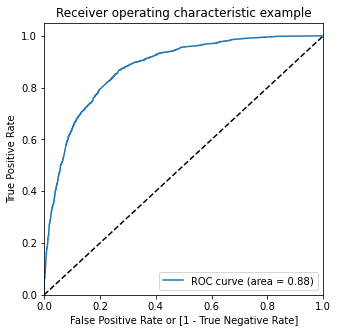

In [201]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [202]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.764552,2853,1,1,1,1,1,1,1,1,1,0,0
1,0,0.016940,6804,0,1,0,0,0,0,0,0,0,0,0
2,1,0.504260,6591,1,1,1,1,1,1,1,0,0,0,0
3,1,0.470500,4922,0,1,1,1,1,1,0,0,0,0,0
4,1,0.519893,5931,1,1,1,1,1,1,1,0,0,0,0


In [203]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.386248  1.000000  0.000000
0.1   0.1  0.595849  0.979491  0.354414
0.2   0.2  0.736058  0.916325  0.622612
0.3   0.3  0.780735  0.872847  0.722767
0.4   0.4  0.798162  0.772765  0.814146
0.5   0.5  0.804816  0.693191  0.875065
0.6   0.6  0.796420  0.611567  0.912752
0.7   0.7  0.764100  0.478261  0.943986
0.8   0.8  0.735266  0.371616  0.964120
0.9   0.9  0.684886  0.204676  0.987093


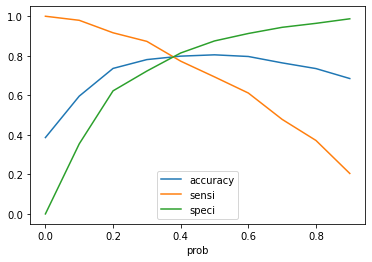

In [204]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [205]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.764552,2853,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.016940,6804,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.504260,6591,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.470500,4922,0,1,1,1,1,1,0,0,0,0,0,1
4,1,0.519893,5931,1,1,1,1,1,1,1,0,0,0,0,1


In [207]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7807351077313055

In [208]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2800, 1074],
       [ 310, 2128]])

In [209]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [210]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8728465955701394

In [211]:
# Let us calculate specificity
TN / float(TN+FP)

0.7227671657201858

In [212]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.27723283427981416


In [213]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6645846346033729


In [214]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9003215434083601


In [255]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7421875

### Precision and recall tradeoff

In [252]:
from sklearn.metrics import precision_recall_curve,recall_score

In [216]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       1
 3       1
 4       1
        ..
 6307    0
 6308    1
 6309    1
 6310    1
 6311    1
 Name: Converted, Length: 6312, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       1
        ..
 6307    0
 6308    1
 6309    1
 6310    1
 6311    0
 Name: predicted, Length: 6312, dtype: int64)

In [219]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

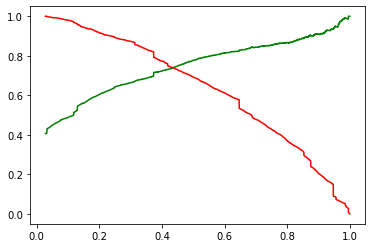

In [220]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#####  Making predictions on the test set 

In [221]:
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

In [222]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Not Specified,City_Select,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent
5114,0.352641,-0.677001,0,0,0,0,0,1,0,0,0,0,0,0,1
6913,-0.025728,1.989079,0,0,0,0,0,0,1,0,0,0,0,0,0
1451,0.352641,-0.031777,0,0,1,0,0,1,0,0,0,0,1,0,0
6506,-1.160836,-0.881805,0,0,0,1,0,0,0,0,0,0,0,1,0
4587,-1.160836,-0.881805,0,0,1,0,0,0,0,0,0,0,0,0,1


In [223]:
X_test_sm = sm.add_constant(X_test)

In [224]:
y_test_pred = res.predict(X_test_sm)

In [225]:
y_test_pred[:10]

5114    0.446243
6913    0.661604
1451    0.098385
6506    0.117595
4587    0.312984
7915    0.724381
3939    0.119446
6128    0.044531
8058    0.293000
4192    0.163155
dtype: float64

In [226]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [227]:
# Let's see the head
y_pred_1.head()

,0
5114,0.446243
6913,0.661604
1451,0.098385
6506,0.117595
4587,0.312984


In [228]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [229]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [230]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [231]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [232]:
y_pred_final.head()

,Converted,CustID,0
0,0,5114,0.446243
1,1,6913,0.661604
2,0,1451,0.098385
3,0,6506,0.117595
4,1,4587,0.312984


In [239]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [240]:
y_pred_final.head()

,Converted,CustID,Converted_Prob
0,0,5114,0.446243
1,1,6913,0.661604
2,0,1451,0.098385
3,0,6506,0.117595
4,1,4587,0.312984


In [241]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [242]:
y_pred_final.head()

,Converted,CustID,Converted_Prob,final_predicted
0,0,5114,0.446243,1
1,1,6913,0.661604,1
2,0,1451,0.098385,0
3,0,6506,0.117595,0
4,1,4587,0.312984,0


In [244]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8015521064301552

In [246]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1409,  273],
       [ 264,  760]])

In [247]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [248]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7421875

In [249]:
# Let us calculate specificity
TN / float(TN+FP)

0.8376932223543401

In [254]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7421875

#### Final Observation 
 - Train Data 
     - Sensitivity : 0.87
     - Specificity : 0.72
     - Accuracy    : 0.78
     
     
 - Test Data 
     - Sensitivity : 0.74
     - Specificity : 0.83
     - Accuracy    : 0.80